## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

# 確認硬體資源

如果你是在 Linux, 若是在 Windows, [請參考](https://blog.csdn.net/idwtwt/article/details/78017565)

# !nvidia-smi

# 選擇使用GPU或CPU

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


# 本範例不需使用 GPU, 將 GPU 設定為 "無"
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255
    if flatten:
        x = x.reshape(len(x), -1)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2**9, 2**8, 2**7, 2**5, 2**4]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0715 00:06:06.240891 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 00:06:06.257885 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 00:06:06.261883 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32)                4128      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total para

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [7]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0715 00:06:06.384845 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 00:06:06.392842 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
model.fit(x_train, 
          y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 00:06:06.502807 11176 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 00:06:06.568786 11176 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 93us/step - loss: 2.1160 - acc: 0.2157 - val_loss: 1.9214 - val_acc: 0.2964
Epoch 2/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.8574 - acc: 0.3238 - val_loss: 1.7664 - val_acc: 0.3632
Epoch 3/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.7349 - acc: 0.3726 - val_loss: 1.6736 - val_acc: 0.3954
Epoch 4/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.6431 - acc: 0.4073 - val_loss: 1.6079 - val_acc: 0.4158
Epoch 5/100
50000/50000 [==============================] - 3s 58us/step - loss: 1.5770 - acc: 0.4339 - val_loss: 1.5639 - val_acc: 0.4398
Epoch 6/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.5409 - acc: 0.4460 - val_loss: 1.5444 - val_acc: 0.4471
Epoch 7/100
50000/50000 [==============================] - 3s 59us/step - loss: 1.5030 - acc: 0.4590 - val_loss: 1.5172 - 

50000/50000 [==============================] - 3s 58us/step - loss: 0.6341 - acc: 0.7699 - val_loss: 1.8946 - val_acc: 0.5175
Epoch 60/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.6336 - acc: 0.7723 - val_loss: 1.8928 - val_acc: 0.5122
Epoch 61/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.6139 - acc: 0.7794 - val_loss: 1.9853 - val_acc: 0.5009
Epoch 62/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.6181 - acc: 0.7769 - val_loss: 1.9927 - val_acc: 0.5080
Epoch 63/100
50000/50000 [==============================] - 3s 59us/step - loss: 0.6048 - acc: 0.7830 - val_loss: 1.9950 - val_acc: 0.5018
Epoch 64/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5894 - acc: 0.7896 - val_loss: 1.9920 - val_acc: 0.5089
Epoch 65/100
50000/50000 [==============================] - 3s 58us/step - loss: 0.5774 - acc: 0.7938 - val_loss: 2.1086 - val_acc: 0.5026
Epoch 66/100
50000/50000 [==============

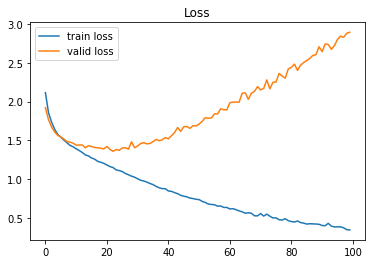

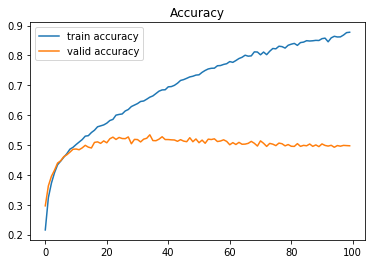

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()